# Part III: Template Matching

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt

### Helper Functions

In [5]:
def show(image, title ="", size = 15):
    width, height = image.shape[0], image.shape[1]
    aspect_ratio = width/height
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(title)
    plt.show()

### 1 -	Open ‘I_Love_OpenCV’ image as query image, and ‘OpenCV’ image as template image.

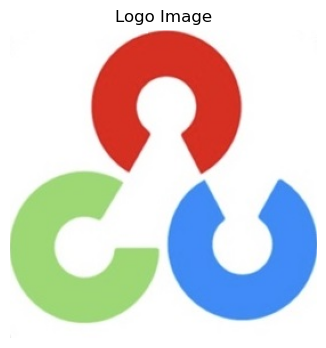

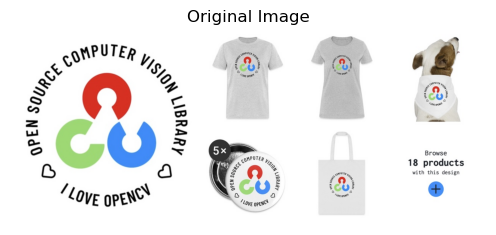

In [6]:
template = cv.imread('Assignment3_Files/OpenCV.jpg')
query = cv.imread('Assignment3_Files/I_Love_OpenCV.jpg')

assert template is not None, 'Template not found'
assert query is not None, 'Query not found'

show(template, 'Logo Image', 4)
show(query, 'Original Image')

### 2 -	Use matchTemplate and TM_SQDIFF measure to find the best match location. Draw a rectangle around the matching area in the query image. Also, display the matching space. Paste the results here. 

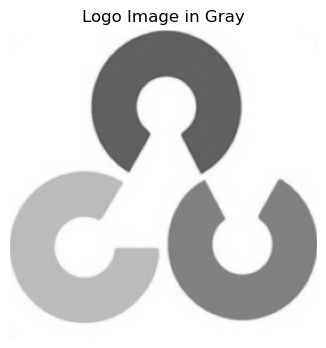

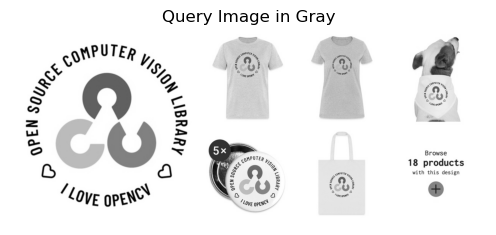

In [7]:
template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
query_gray = cv.cvtColor(query, cv.COLOR_BGR2GRAY)

show(template_gray, 'Logo Image in Gray', 4)
show(query_gray, 'Query Image in Gray')

In [8]:
# Get the dimensions of the template
w, h = template_gray.shape[::-1]

# Step 2: Use matchTemplate with TM_SQDIFF
result_sqdiff = cv.matchTemplate(query_gray, template_gray, cv.TM_SQDIFF)
min_val_sqdiff, max_val_sqdiff, min_loc_sqdiff, max_loc_sqdiff = cv.minMaxLoc(result_sqdiff)

# Draw a rectangle around the best match location using TM_SQDIFF
best_match_loc_sqdiff = min_loc_sqdiff
bottom_right_sqdiff = (best_match_loc_sqdiff[0] + w, best_match_loc_sqdiff[1] + h)
restult = query.copy()
cv.rectangle(restult, best_match_loc_sqdiff, bottom_right_sqdiff, (0, 255, 0), 2)


array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

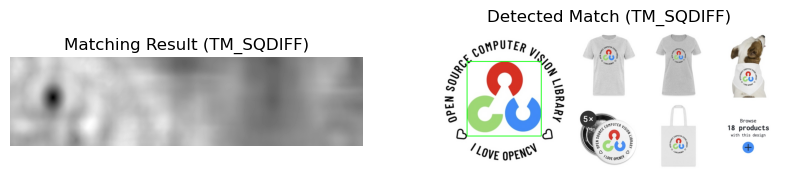

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Matching Result (TM_SQDIFF)')
plt.imshow(result_sqdiff, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Match (TM_SQDIFF)')
plt.imshow(cv.cvtColor(restult, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()


### 3 -	Repeat matching, using TM_CCORR measure this time. Similarly, paste the results here. 

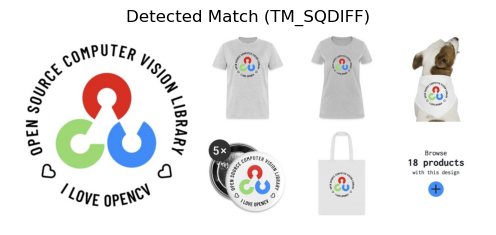

In [10]:
show(query, 'Detected Match (TM_SQDIFF)')

### 4 -	How are the two results and the matching space different? Explain.
The results from using TM_SQDIFF and TM_CCORR are very different in both the matching areas and the locations identified. With TM_SQDIFF, the matching area reveals darker regions where the match is stronger, as lower values indicate smaller differences; the best match is represented as a dark spot corresponding to the minimum value. This method is sensitive to exact pixel intensity matches and can be influenced by changes in lighting. On the other hand, TM_CCORR creates a matching area where brighter regions indicate better matches, since higher values reflect stronger correlation; the best match appears as a bright spot corresponding to the maximum value. TM_CCORR tends to be more resilient to lighting variations and emphasizes structural similarities over exact pixel values. As a result, the matching areas identified by each method can differ, with TM_CCORR likely offering more dependable matches in images with fluctuating illumination, while TM_SQDIFF seem to be more accurate under consistent lighting conditions.

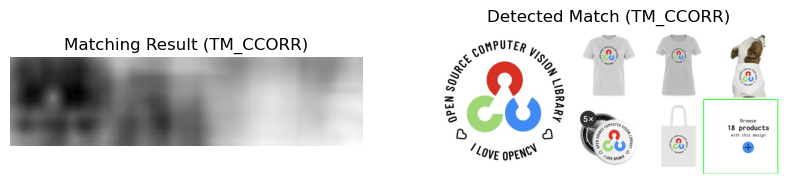

In [11]:
# Step 3: Repeat matching using TM_CCORR

result_ccorr = cv.matchTemplate(query_gray, template_gray, cv.TM_CCORR)
min_val_ccorr, max_val_ccorr, min_loc_ccorr, max_loc_ccorr = cv.minMaxLoc(result_ccorr)

# Draw a rectangle around the best match location using TM_CCORR
best_match_loc_ccorr = max_loc_ccorr
bottom_right_ccorr = (best_match_loc_ccorr[0] + w, best_match_loc_ccorr[1] + h)
restult = query.copy()
cv.rectangle(restult, best_match_loc_ccorr, bottom_right_ccorr, (0, 255, 0), 2)

# Display the matching result and the query image with the rectangle
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Matching Result (TM_CCORR)')
plt.imshow(result_ccorr, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Detected Match (TM_CCORR)')
plt.imshow(cv.cvtColor(restult, cv.COLOR_BGR2RGB))
plt.axis('off')

plt.show()